5	


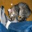

5	


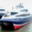

5	


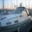

5	


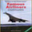

5	


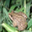

5	


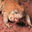

5	


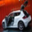

5	


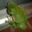

5	


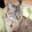

5	


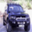

5	


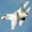

5	


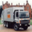

5	


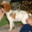

5	


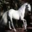

5	


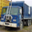

5	


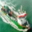

5	


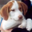

5	


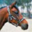

5	


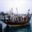

5	


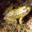

5	


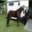

5	


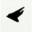

5	


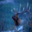

5	


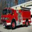

5	


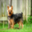

5	


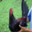

5	


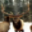

5	


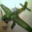

5	


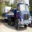

5	


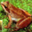

5	


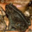

5	


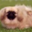

5	


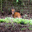

5	


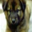

5	


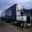

5	


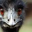

5	


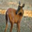

5	


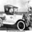

5	

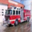

5	


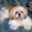

5	


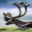

5	


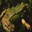

5	


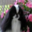

5	


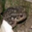

5	


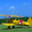

5	


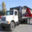

5	


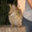

5	


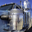

5	


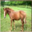

5	


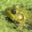

6.1988830566406e-06	 Seconds since start	


35.980254173279	 Seconds since start	
1000	
10	% accuracy	
   0
   0
   0
   0
 232
   0
   0
   0
   0
   0
[torch.ByteTensor of size 10]



In [12]:
require 'paths'
require 'nn'

if (not paths.filep("cifar10torchsmall.zip")) then
    os.execute('wget -c https://s3.amazonaws.com/torch7/data/cifar10torchsmall.zip')
    os.execute('unzip cifar10torchsmall.zip')
end
testset = torch.load('cifar10-test.t7')
classes = {'airplane', 'automobile', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck'}

cifarnet = torch.load("cifarnet.t7")


-- for checking the code
-- predict = cifarnet:forward(testset.data[1]:resize(3072):double())
-- print(predict:exp())
-- print(testset.label[1])
-- itorch.image(testset.data[1])

for i=1,50 do
    local predict = cifarnet:forward(testset.data[i]:resize(3072):double()):exp()
    local max = torch.max(predict)
    for j = 1,10 do
        if max == predict[j] then
            print(j)
            itorch.image(testset.data[i])
        end
    end
end
-- for checking the code ends here

timer = torch.Timer()
print(timer:time().real," Seconds since start")
correct = 0
classcheck = torch.ByteTensor(10)

for i=1,10 do
    classcheck[i] = 0
end
for i=1,10000 do
    local predict = cifarnet:forward(testset.data[1]:resize(3072):double()):exp()
    local max = torch.max(predict)
    for j = 1,10 do
        if max == predict[j] then            
            if testset.label[i] == j then
                correct = correct+1
                classcheck[j] = classcheck[j] +1                
            end
        end
    end    
end
print(timer:time().real," Seconds since start")

print(correct)
accuracy = (correct/10000)*100
print(accuracy, "% accuracy")
print(classcheck)